In [13]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [14]:
# função para traçar reta
def coord(w0,w1,w2,x1):
  if w2 != 0:
    return (-w0-w1*x1)/w2
  else:
    return 2000 # Inf

In [15]:
# Dataset porta lógica AND
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y = np.array([-1,-1,-1,1])

In [16]:
# confere entrada - saída
X[0:4], y[0:4]

(array([[-1, -1],
        [-1,  1],
        [ 1, -1],
        [ 1,  1]]),
 array([-1, -1, -1,  1]))

In [17]:
# base
# classe Perceptron

class Perceptron(object):

    def __init__(self, eta=0.1, epocas=50):
        self.eta = eta
        self.epocas = epocas
        self.w_ = np.random.rand(1 + X.shape[1]) - 0.5

    def treina(self, X, y):
        self.erros_ = []
        for _ in range(self.epocas):
            erros = 0
            for xi, target in zip(X, y):

                # atualizacao PERCEPTRON classico
                atualiza = self.eta * (target - self.predict(xi))

                # atualizacao abordagem ADALINE
                # atualiza = self.eta * (target - self.somat(xi))

                self.w_[0] +=  atualiza * 1
                self.w_[1:] +=  atualiza * xi

                # erros PERCEPTRON
                erros += int(atualiza != 0.0)

                # erros ADALINE
                # erros += (target - self.somat(xi))

            self.erros_.append(erros)
        return self
    
    def somat(self, X):
        return self.w_[0] + np.dot(X, self.w_[1:])

    def predict(self, X):
        return np.where(self.somat(X) >= 0.0, 1, -1)

In [18]:
# cria objeto 'rna' : um neurônio Perceptron
rna = Perceptron(epocas=50, eta=0.01)

Pesos iniciais: [ 0.18035728  0.11274601 -0.27526906]


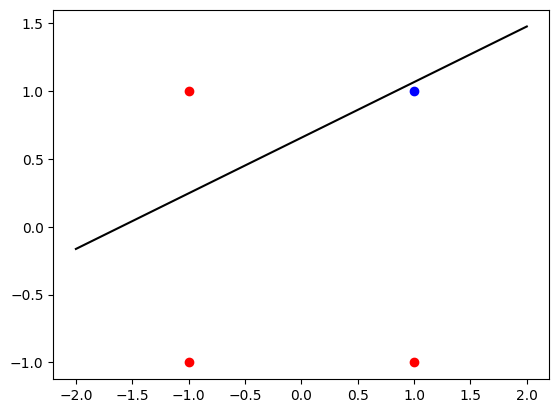

In [19]:
# mostra o classificador antes do treinamento
print(f'Pesos iniciais: {rna.w_}')
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')
plt.show()

In [20]:
rna.treina(X, y)
# rna.treinaHebb(X, y)

In [21]:
print(f'Pesos depois treinamento: {rna.w_}')

Pesos depois treinamento: [-0.05964272  0.07274601  0.04473094]


Análise dos resultados do treinamento (evolução do erro e visualização do classificador linear resultante)

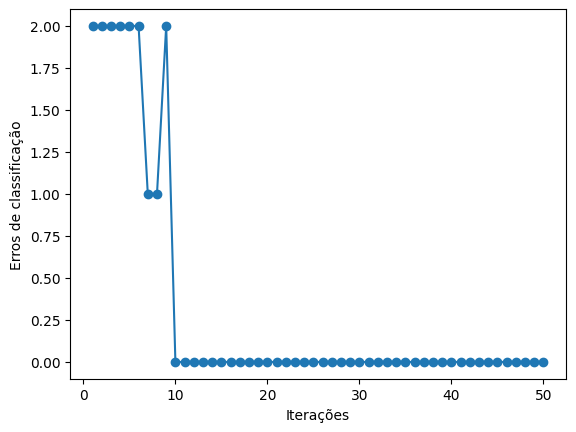

In [22]:
# evolução do erro
plt.plot(range(1, len(rna.erros_)+1), rna.erros_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Erros de classificação')
plt.show()

Pesos depois treinamento [w0, w1,w2]: [-0.05964272  0.07274601  0.04473094]


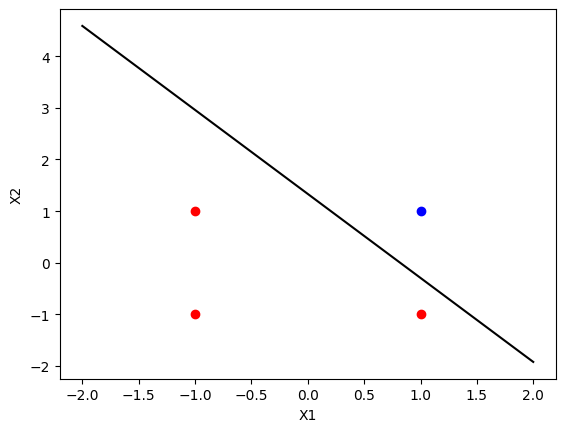

In [23]:
print(f'Pesos depois treinamento [w0, w1,w2]: {rna.w_}')
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [24]:
rna.erros_

[2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]